# Email Spam Classification

### Objective:
Classify emails as either **Not Spam** (Normal State) or **Spam** (Abnormal State) using machine learning models.

### Tasks:
1. Load and preprocess the dataset  
2. Explore class distribution and visualize data  
3. Train and evaluate **K-Nearest Neighbors (KNN)**  
4. Train and evaluate **Support Vector Machine (SVM)**  
5. Experiment with different hyperparameters to improve performance  
6. Compare model metrics: Accuracy, Precision, Recall, Confusion Matrix


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

### Step 1: Load the Dataset

In [2]:
df = pd.read_csv("emails.csv")
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [4]:
print("Initial shape:", df.shape)

Initial shape: (5172, 3002)


### Step 2: Data Cleaning and Preprocessing
- Drop rows with missing values
- Separate features (`X`) and target (`y`)  
- Standardize the features
- Split data into training and test sets

In [5]:
# Drop rows with missing values
df.dropna(inplace=True)
print("After dropping missing values:", df.shape)

After dropping missing values: (5172, 3002)


In [6]:
X = df.iloc[:, 1:-1]  # word count features
y = df.iloc[:, -1]    # labels: 'spam' or 'not spam'

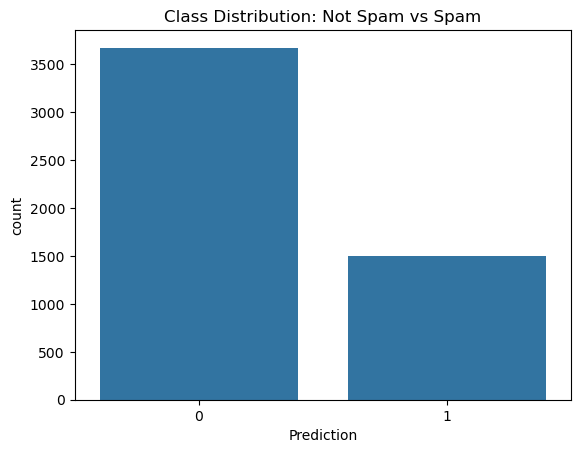

In [7]:
# Check class distribution
sns.countplot(x=y)
plt.title("Class Distribution: Not Spam vs Spam")
plt.show()

In [8]:
# Split data (stratify to preserve class ratio)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [9]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Step 3: K-Nearest Neighbours
Train KNN classifiers with different values of **k** and evaluate their performance.

In [10]:
# KNN for multiple k values, store results
k_values = [3, 5, 7]
knn_results = {}  # store metrics for each k

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_knn = knn.predict(X_test_scaled)
    
    # Store metrics
    knn_results[k] = {
        "accuracy": accuracy_score(y_test, y_pred_knn),
        "precision": precision_score(y_test, y_pred_knn, pos_label=1),
        "recall": recall_score(y_test, y_pred_knn, pos_label=1),
        "f1_score": f1_score(y_test, y_pred_knn, pos_label=1),
        "confusion_matrix": confusion_matrix(y_test, y_pred_knn)
    }
    
    # Print metrics
    print(f"\nKNN with k={k}")
    print(f"Accuracy: {knn_results[k]['accuracy']:.3f}")
    print(f"Precision: {knn_results[k]['precision']:.3f}")
    print(f"Recall: {knn_results[k]['recall']:.3f}")
    print(f"F1-score: {knn_results[k]['f1_score']:.3f}")
    print(f"Confusion Matrix:\n{knn_results[k]['confusion_matrix']}")


KNN with k=3
Accuracy: 0.865
Precision: 0.696
Recall: 0.947
F1-score: 0.802
Confusion Matrix:
[[611 124]
 [ 16 284]]

KNN with k=5
Accuracy: 0.834
Precision: 0.643
Recall: 0.957
F1-score: 0.769
Confusion Matrix:
[[576 159]
 [ 13 287]]

KNN with k=7
Accuracy: 0.801
Precision: 0.599
Recall: 0.947
F1-score: 0.734
Confusion Matrix:
[[545 190]
 [ 16 284]]


### Step 4: Support Vector Machine
Train SVM classifiers with different kernels and C values using GridSearchCV to find the best model.


In [11]:
# Initialize SVM with default parameters
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

# Store metrics
svm_metrics = {
    "accuracy": accuracy_score(y_test, y_pred_svm),
    "precision": precision_score(y_test, y_pred_svm, pos_label=1),
    "recall": recall_score(y_test, y_pred_svm, pos_label=1),
    "f1_score": f1_score(y_test, y_pred_svm, pos_label=1),
    "confusion_matrix": confusion_matrix(y_test, y_pred_svm)
}

# Print metrics
print("\nSVM (Default Settings)")
print(f"Accuracy: {svm_metrics['accuracy']:.3f}")
print(f"Precision: {svm_metrics['precision']:.3f}")
print(f"Recall: {svm_metrics['recall']:.3f}")
print(f"F1-score: {svm_metrics['f1_score']:.3f}")
print(f"Confusion Matrix:\n{svm_metrics['confusion_matrix']}")


SVM (Default Settings)
Accuracy: 0.930
Precision: 0.983
Recall: 0.773
F1-score: 0.866
Confusion Matrix:
[[731   4]
 [ 68 232]]


### Step 5: Compare Models
Compare **KNN** and **SVM** based on accuracy, precision, recall, and F1-score.


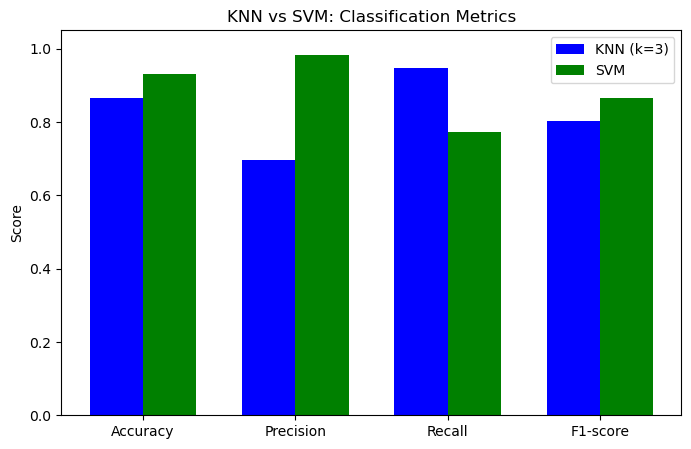

In [12]:
# Compare metrics for KNN (k=3) and SVM
best_k = 3
metrics = ["Accuracy", "Precision", "Recall", "F1-score"]

knn_scores = [
    knn_results[best_k]["accuracy"],
    knn_results[best_k]["precision"],
    knn_results[best_k]["recall"],
    knn_results[best_k]["f1_score"]
]

svm_scores = [
    svm_metrics["accuracy"],
    svm_metrics["precision"],
    svm_metrics["recall"],
    svm_metrics["f1_score"]
]

# Plot grouped bar chart
x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(8,5))
plt.bar(x - width/2, knn_scores, width, label=f'KNN (k={best_k})', color='blue')
plt.bar(x + width/2, svm_scores, width, label='SVM', color='green')

plt.xticks(x, metrics)
plt.ylim(0,1.05)
plt.ylabel("Score")
plt.title("KNN vs SVM: Classification Metrics")
plt.legend()
plt.show()